In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = 5000
x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

In [4]:
x

array([  0.48752452,   0.46963999,   0.17897634, ..., -45.15251762,
       -44.17184858, -45.51736482])

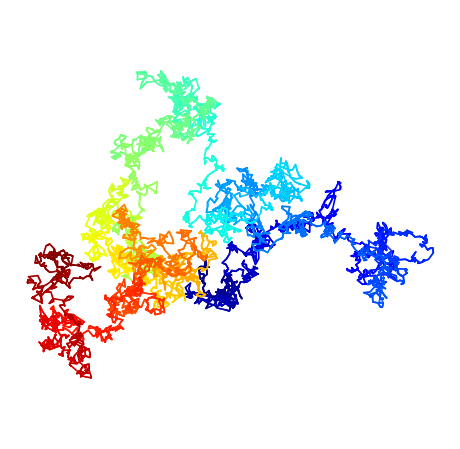

In [5]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

Fitting parameters


In [6]:
def load_data(filename, multi_particle_index = 0):


    if filename.endswith("csv"):
        data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    else:
        from src.xml2csv import xml2csv
        #multi_particle_index used to determine what track to use if there are multiple (usually from the xaml file)
        a = xml2csv(filename, 2)

        data = a[multi_particle_index]

        data = np.array(data)

    return data


In [26]:
FILE_LOCATION = "/home/aavash/Documents/GitHub/Labs/Laser Tweezers/tracking_files/cleaned_tracking/day3_vid2_Tracks0-3500.xml"

INDEX_NUM = 0

In [27]:
data = load_data(filename=FILE_LOCATION, multi_particle_index=INDEX_NUM)
print(f"The number of data points is {len(data)}")

The number of data points is 134


In [28]:
training_data = data[:int(len(data)*0.8)]
print(f"The number of samples in the trainig set is {len(training_data)}")
training_data_x = training_data[:,0]
training_data_y = training_data[:,1]

The number of samples in the trainig set is 107


In [29]:
#calculate the difference between each steps
def diff_calc(data, fps=62.0, immersion=True):
    data_store = []
    time_step = []
    mean_squred_deviation = []

    time_interval =  1 / fps


    if immersion:
        calibration_factor = 0.6*1e-3*0.1/979.3
    else:
        calibration_factor = (0.1*0.001)/1094.4
    data = data * calibration_factor

    for i in range(0, len(data), 1):
        if i == 0:
            data_store.append(0)
            mean_squred_deviation.append(0)
            time_step.append(0)

        else:
            
            data_store.append(data[i] - data[i-1])
            
            mean_squred_deviation.append((data[i] - data[i-1])**2)

            time_step.append(time_interval * i)

    data_store = np.array(data_store)
    return data_store, time_step

In [30]:
diff_x, time_x = diff_calc(training_data_x)
diff_y, time_y = diff_calc(training_data_y)

In [31]:
print(np.mean(diff_x))

diff_x = diff_x - np.mean(diff_x)
diff_x = diff_x/ np.std(diff_x)

0.9906542056074766


In [32]:
np.shape(diff_x)

(107,)

In [33]:
#remove data points greater than 3 standard deviations
def remove_outliers(data, threshold=1):
    data = np.array(data)
    mean = np.mean(data)
    std = np.std(data)
    data = data[np.abs(data - mean) <= threshold * std]
    return data
diff_x = remove_outliers(diff_x)
np.shape(diff_x)

(106,)

(array([  0.,   0.,   0.,   0.,   0., 106.,   0.,   0.,   0.,   0.]),
 array([-0.40287141, -0.30287141, -0.20287141, -0.10287141, -0.00287141,
         0.09712859,  0.19712859,  0.29712859,  0.39712859,  0.49712859,
         0.59712859]),
 <BarContainer object of 10 artists>)

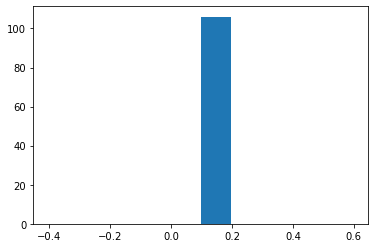

In [36]:
plt.hist(diff_x, bins=10)


In [37]:
from scipy.optimize import curve_fit

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

parameters, covariance = curve_fit(gauss, diff_x)


TypeError: curve_fit() missing 1 required positional argument: 'ydata'

ValueError: x and y must be the same size

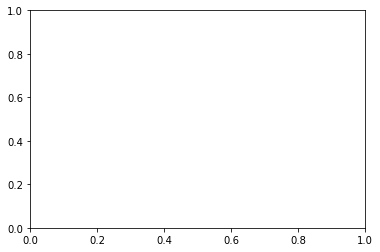

In [38]:
plt.scatter(x=time_x, y=diff_x)


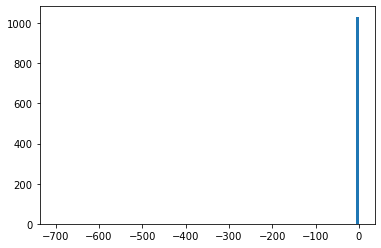

In [127]:
plt.hist(diff_x, bins=100);